In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import yfinance as yf

In [3]:
!pip install yfinance

In [4]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ["RELIANCE.NS", "TCS.NS", "HINDUNILVR.NS", "HDFCBANK.NS", "ITC.NS", "LT.NS", "INFY.NS"]

start_date = "2018-10-01"
end_date = "2023-10-01"

In [5]:
stock_data = {}

for stock in stocks:
  ticker = yf.Ticker(stock)
  stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

In [6]:
stock_prices

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,1103.542114,1995.629639,1501.627808,968.803223,238.439072,1131.948120,642.441345
2018-10-03 00:00:00+05:30,1079.709717,1913.611816,1480.186401,966.756592,236.914261,1129.544678,626.824463
2018-10-04 00:00:00+05:30,1005.480225,1826.860962,1439.132324,931.820801,230.413559,1140.835815,608.497375
2018-10-05 00:00:00+05:30,939.717529,1860.348877,1425.051514,935.414307,221.906479,1113.174561,623.468872
2018-10-08 00:00:00+05:30,993.967285,1838.141846,1425.782715,925.752197,219.258026,1102.245850,614.735413
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,2340.449951,3525.834961,2434.109375,1510.375122,428.591858,2879.861816,1447.156982
2023-09-26 00:00:00+05:30,2342.500000,3534.262451,2437.156738,1516.935547,428.446594,2889.833496,1433.904175
2023-09-27 00:00:00+05:30,2368.899902,3537.811035,2459.572510,1506.281006,434.934509,2941.923828,1440.137817


In [7]:
log_returns = np.log(stock_prices / stock_prices.shift(1))

In [8]:
log_returns

,RELIANCE.NS,TCS.NS,HINDUNILVR.NS,HDFCBANK.NS,ITC.NS,LT.NS,INFY.NS
Date,,,,,,,
2018-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-03 00:00:00+05:30,-0.021833,-0.041967,-0.014382,-0.002115,-0.006416,-0.002126,-0.024609
2018-10-04 00:00:00+05:30,-0.071227,-0.046393,-0.028128,-0.036806,-0.027823,0.009947,-0.029674
2018-10-05 00:00:00+05:30,-0.067641,0.018165,-0.009832,0.003849,-0.037620,-0.024545,0.024306
2018-10-08 00:00:00+05:30,0.056125,-0.012009,0.000513,-0.010383,-0.012007,-0.009866,-0.014107
...,...,...,...,...,...,...,...
2023-09-25 00:00:00+05:30,-0.006176,-0.007381,-0.002662,0.000882,-0.001129,-0.005497,-0.014814
2023-09-26 00:00:00+05:30,0.000876,0.002387,0.001251,0.004334,-0.000339,0.003457,-0.009200
2023-09-27 00:00:00+05:30,0.011207,0.001004,0.009155,-0.007049,0.015029,0.017865,0.004338


In [9]:
log_returns = log_returns[1:]

In [10]:
print(log_returns.mean() * NUM_TRADING_DAYS)

RELIANCE.NS      0.153804
TCS.NS           0.113347
HINDUNILVR.NS    0.097715
HDFCBANK.NS      0.089981
ITC.NS           0.120480
LT.NS            0.198878
INFY.NS          0.160276
dtype: float64


In [11]:
print(log_returns.std() * np.sqrt(NUM_TRADING_DAYS))

RELIANCE.NS      0.311704
TCS.NS           0.252949
HINDUNILVR.NS    0.238550
HDFCBANK.NS      0.269939
ITC.NS           0.264995
LT.NS            0.283760
INFY.NS          0.292192
dtype: float64


In [12]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []

In [13]:
for _ in range(NUM_SIMULATIONS):
  w = np.random.random(len(stocks))
  w /= np.sum(w)
  portfolio_weights.append(w)
  port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
  portfolio_returns.append(port_return)
  port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
  portfolio_risks.append(port_risk)

In [14]:
portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

In [15]:
portfolios = pd.DataFrame({"Return": portfolio_returns, "Risk": portfolio_risks, "Sharpe Ratio": portfolio_returns / portfolio_risks})

In [16]:
portfolios

,Return,Risk,Sharpe Ratio
0,0.148320,0.190078,0.780310
1,0.143475,0.188112,0.762708
2,0.138257,0.184972,0.747448
3,0.130836,0.175963,0.743543
4,0.134902,0.180275,0.748317
...,...,...,...
9995,0.123658,0.198371,0.623366
9996,0.133452,0.184444,0.723534
9997,0.135522,0.180733,0.749847
9998,0.139492,0.183055,0.762024


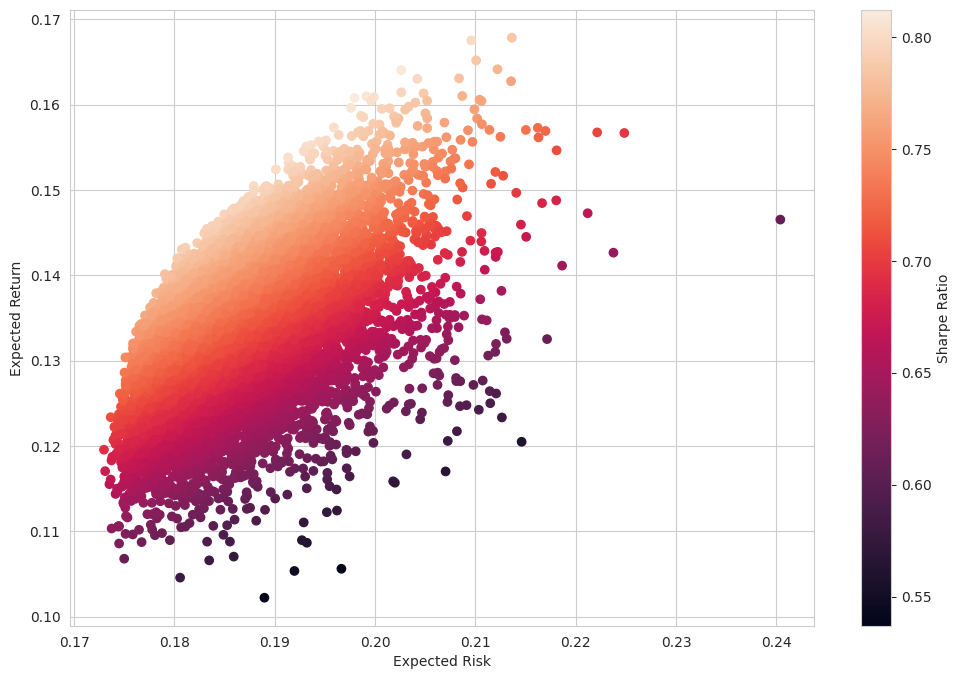

In [17]:
plt.figure(figsize = (12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = portfolio_returns/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [18]:
sharpe_ratios = portfolio_returns / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
  if sharpe_ratios[i] == np.amax(sharpe_ratios):
    ind = i

In [19]:
sharpe_ratios[ind]

0.8121222656088918

In [20]:
portfolio_returns[ind]

0.16077262944658072